In [1]:
import pandas as pd
import numpy as np
from apyori import apriori
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('titanic.csv', index_col=0)
# print(df)

transactions = []

for _, row in df.iterrows():
    transaction = [
        row["Class"],
        row["Sex"],
        row["Age"],
        row["Survived"]
    ]   
    transactions.append(transaction)

print(transactions[0])

['3rd', 'Male', 'Child', 'No']


In [4]:
rules = apriori(transactions, min_support=0.005, min_confidence=0.8)
results = list(rules)
print(results[0])
print(f'Znaleziono {len(results)} reguł.')

RelationRecord(items=frozenset({'Adult'}), support=0.9504770558836892, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Adult'}), confidence=0.9504770558836892, lift=1.0)])
Znaleziono 57 reguł.


In [6]:
def inspect(results):
    rule_list = []
    for result in results:
        for stat in result.ordered_statistics:
            rule_list.append({
                'Base': tuple(stat.items_base),
                'Add': tuple(stat.items_add),
                'Support': result.support,
                'Confidence': stat.confidence,
                'Lift': stat.lift
            })
    return pd.DataFrame(rule_list)
df_results = inspect(results)
rules_df = df_results.sort_values(by='Confidence', ascending=False)
print(rules_df.head(10))

                    Base       Add   Support  Confidence      Lift
4                (Crew,)  (Adult,)  0.402090         1.0  1.052103
13             (No, 1st)  (Adult,)  0.055429         1.0  1.052103
53     (No, 2nd, Female)  (Adult,)  0.005906         1.0  1.052103
61       (No, 2nd, Male)  (Adult,)  0.069968         1.0  1.052103
62  (Female, 2nd, Child)    (Yes,)  0.005906         1.0  3.095640
74   (Yes, Crew, Female)  (Adult,)  0.009087         1.0  1.052103
77      (No, Male, Crew)  (Adult,)  0.304407         1.0  1.052103
70   (No, Female, Child)    (3rd,)  0.007724         1.0  3.117564
71     (No, Male, Child)    (3rd,)  0.015902         1.0  3.117564
80     (Yes, Male, Crew)  (Adult,)  0.087233         1.0  1.052103


In [7]:
survived_yes = rules_df[rules_df['Add'].apply(lambda x: 'Yes' in x)]
survived_no = rules_df[rules_df['Add'].apply(lambda x: 'No' in x)]
print(survived_yes)
print(survived_no)

                     Base           Add   Support  Confidence      Lift
62   (Female, 2nd, Child)        (Yes,)  0.005906    1.000000  3.095640
20           (2nd, Child)        (Yes,)  0.010904    1.000000  3.095640
15          (1st, Female)        (Yes,)  0.064062    0.972414  3.010243
47   (1st, Adult, Female)        (Yes,)  0.063607    0.972222  3.009650
46          (1st, Female)  (Yes, Adult)  0.063607    0.965517  3.249394
21          (2nd, Female)        (Yes,)  0.042254    0.877358  2.715986
72         (Crew, Female)  (Yes, Adult)  0.009087    0.869565  2.926473
43         (Crew, Female)        (Yes,)  0.009087    0.869565  2.691861
73  (Adult, Female, Crew)        (Yes,)  0.009087    0.869565  2.691861
54   (2nd, Adult, Female)        (Yes,)  0.036347    0.860215  2.662916
                  Base          Add   Support  Confidence      Lift
59  (Male, 2nd, Adult)        (No,)  0.069968    0.916667  1.354083
22         (2nd, Male)        (No,)  0.069968    0.860335  1.270871
57  

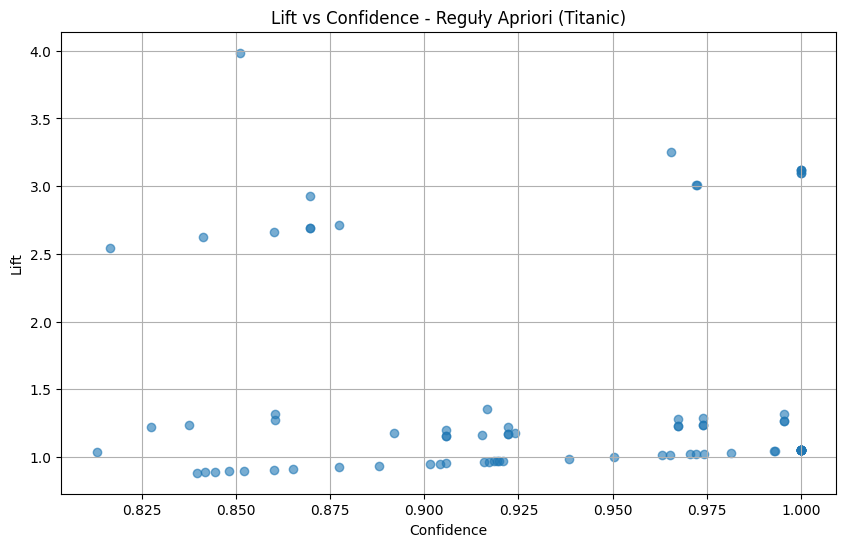

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(rules_df['Confidence'], rules_df['Lift'], alpha=0.6)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Lift vs Confidence - Reguły Apriori (Titanic)')
plt.grid(True)
plt.show()